In [1]:
import sys
sys.path.append('/Users/jpnousu/pyAPES_main')
import pandas as pd

from pyAPES.utils.iotools import read_forcing
from pyAPES.canopy.forestfloor import ForestFloor
from pyAPES.parameters.mlm_parameters import gpara, cpara, spara # model configuration, canopy parameters, soil parameters

In [2]:
# Creating forestfloor
forestfloor = ForestFloor(cpara['forestfloor'])

# Manipulating the params to correspond to those of Degerö
gpara['forc_filename'] = r'/Users/jpnousu/pyAPES_main/forcing/Degero/Degero_forcing_2014-2016.dat'
gpara['start_time'] = '2014-09-01'
gpara['end_time'] = '2015-06-01'

/Users/jpnousu/pyAPES_main/pyAPES/bottomlayer/organiclayer.py:1172: RuntimeWarning: invalid value encountered in power
  Psi = -1e-2 / alfa*(s**(1.0 / m) - 1.0)**(1.0 / n)  # m


In [3]:
# Reading the forcing file
forcing = read_forcing(
    forcing_file=gpara['forc_filename'],
    start_time=gpara['start_time'],
    end_time=gpara['end_time'],
    dt=gpara['dt']
)

forcing['Prec_liquid'] = forcing['Prec'].where(forcing['Tair'] > 1, 0)
forcing['Prec_ice'] = forcing['Prec'].where(forcing['Tair'] <= 1, 0)

In [4]:
# Looping over the forcing file, running forestfloor model for each timestep and saving the results
results_df = pd.DataFrame()

for index, row in forcing.iterrows():
    ff_forcing = {  # Reset the dictionary for each iteration
        'precipitation_rain': row['Prec_liquid'] / gpara['dt'],  # Convert mm to kg m-2 s-1
        'precipitation_snow': row['Prec_ice'] / gpara['dt'],  # Convert mm to kg m-2 s-1
        'wind_speed': row['U'], # m/s
        'par': row['diffPar'] + row['dirPar'],  # Total PAR [W m-2]
        'nir': row['diffNir'] + row['dirNir'],  # Total NIR [W m-2]
        'lw_dn': row['LWin'],  # Longwave downward radiation [W m-2]
        'h2o': row['H2O'] / 1000,  # H2O [mol mol-1]
        'co2': row['CO2'] * 1e6,  # Convert mol mol-1 to ppm
        'air_temperature': row['Tair'],  # Air temperature [degC]
        'air_pressure': row['P'],  # Air pressure [Pa]
        'soil_temperature': 0, # Soil temperature [degC]
        'soil_water_potential': -10,
        'soil_volumetric_water': 0.3,
        'soil_volumetric_air': 0.3,
        'soil_pond_storage': 0
    }
    ff_params = {
        'soil_thermal_conductivity': 0.8,
        'soil_hydraulic_conductivity': 1e-5,
        'soil_depth': 0.02,
        'reference_height': 2.0,
    }
    ff_controls = {
        'energy_balance': True,
        'logger_info': 'test',
    }
    # --- solve forestfloor
    ff_fluxes, ff_states, gt_results = forestfloor.run(
                dt=gpara['dt'],
                forcing=ff_forcing,
                parameters=ff_params,
                controls=ff_controls
                )
    
    # Combine results into a single dictionary with all values as floats
    combined_results = {
        'time': index,  # Use the time index from the forcing DataFrame
        **{f'gt_{key}': value[0] for key, value in gt_results.items()},  # Add gt_results
        **{f'ff_{key}': value for key, value in ff_states.items()},  # Add gt_results

    }

    # Append the combined results to the results DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([combined_results])], ignore_index=True)

results_df.set_index('time', inplace=True)

/Users/jpnousu/pyAPES_main/pyAPES/bottomlayer/organiclayer.py:1172: RuntimeWarning: invalid value encountered in power
  Psi = -1e-2 / alfa*(s**(1.0 / m) - 1.0)**(1.0 / n)  # m


SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0


/Users/jpnousu/pyAPES_main/pyAPES/bottomlayer/organiclayer.py:1114: RuntimeWarning: invalid value encountered in power
  relative_diffusivity = (np.power(Ta / 293.16, 1.75) * np.power(afp, 10.0/3.0) / porosity**2)


SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0
SWE 0.0


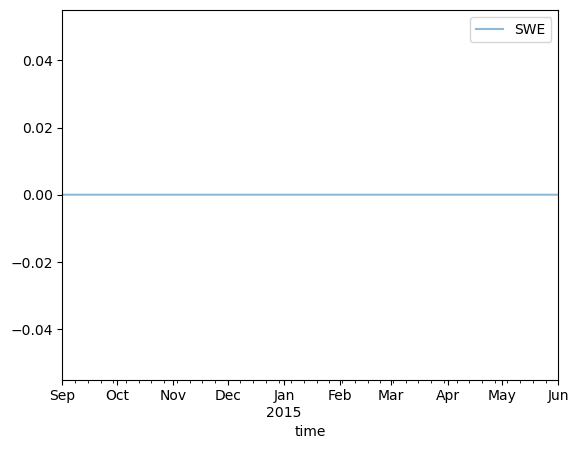

In [6]:
import matplotlib.pyplot as plt

#forcing['Prec_ice'].plot(alpha=0.5, label='Prec_ice')
#forcing['Prec_liquid'].plot(alpha=0.5, label='Prec_liquid')
results_df['ff_snow_water_equivalent'].plot(alpha=0.5, label='SWE')
plt.legend()